In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
import numpy as np

In [32]:
a = np.array([[1,1,1,1,0],[1,1,1,1,0]])

In [35]:
np.sum(a, axis=1) - 1

array([3, 3])

In [2]:
import torch
from torch import nn
import vae_cyc as vc
import datamol as dm
import pandas as pd

In [3]:
df = pd.read_csv('/workspace/moses.csv')

In [5]:
vocab = vc.Vocab(df, 'SMILES')

extracting charset..


100%|██████████| 1584663/1584663 [00:04<00:00, 334003.36it/s]


In [ ]:
m = vc.Transformer.load_from_checkpoint('/workspace/pubchem-vae-large/last.ckpt')

In [ ]:
m = m.eval()

In [24]:
outputs = []
idx = 135
smi = df.SMILES.values[idx]
# smi = 'COc1ccc(C2CC(=O)Nc3nc(C)nn3C2)cc1'
outputs.append(smi)
for i in range(1):
    outputs.append(m.generate(num_samples=1, smiles=[smi]))
print(smi)
print(outputs)

Cc1ccc(C)c(NC(=O)Cn2c(=O)oc3ccccc32)c1
Cc1ccc(S(=O)(=O)N2CCCC2C(=O)N2CCCC2)cc1
['Cc1ccc(S(=O)(=O)N2CCCC2C(=O)N2CCCC2)cc1', 'Cc1ccc(C)c(NC(=O)Cn2c(=O)oc3ccccc32)c1']


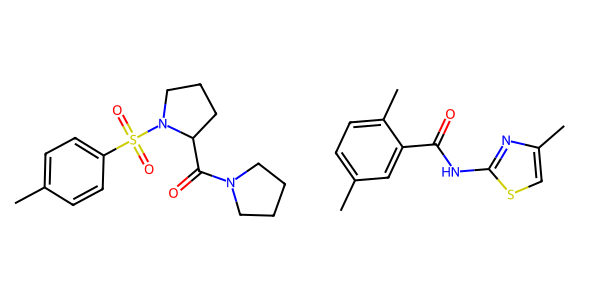

In [23]:
dm.to_image(outputs)

N#Cc1ccc(-c2nc(-c3ccccc3)no2)cc1
CCc1nc(C)c(C(=O)Nc2ccc(-n3cccn3)cc2)s1
CCc1nnc(NC(=O)c2ccc(-c3ccccc3)o2)s1
CCN(CC)S(=O)(=O)c1ccc(C(=O)NC)cc1
COCCN(C)C(=O)c1ccc(NC(=O)c2ccccc2)cc1


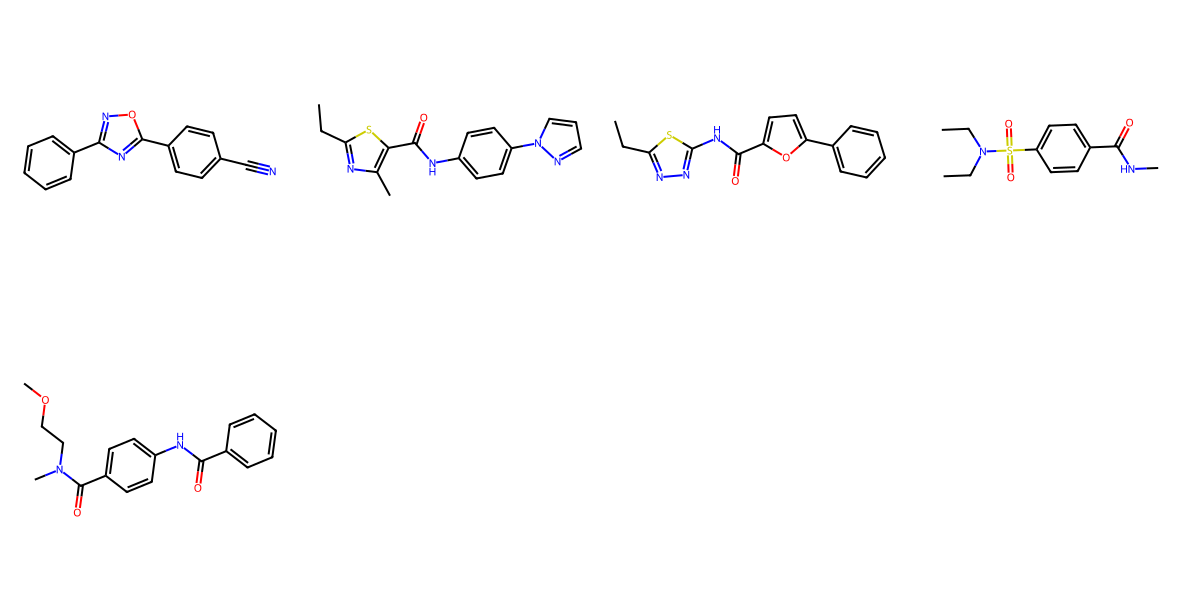

In [13]:
import datamol as dm
outputs = [] 
for i in range(5):
    outputs.append(m.generate(num_samples=1))
dm.to_image(outputs)